Toyota Youtube videos sentiment analysis


2- Toyota Corolla SE vs. 2023 Honda Civic


In [7]:
import pandas as pd
from textblob import TextBlob

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file
file_path = "/content/drive/MyDrive/Toyota_competitor.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id            author                                        description  \
0   1   @CarConfections  CORRECTION: The Honda Civic only includes *2 y...   
1   2  @madmartigan3921  I wonder how long before we need a subscriptio...   
2   3       @shayan3699  I have honda civic sport 2023 and iii soo happ...   
3   4       @joebob5170  I like this civic but can I trust the turbo on...   
4   5        @robme3660  I\'d have to go with the Rolla. A massive 14 m...   

                         guid   to  likecount  \
0  UgzRs7fFDmriIK6POix4AaABAg  NaN         55   
1  UgygVE-laj1YAcENZ1p4AaABAg  NaN          0   
2  Ugyk4DxiY-NXoiLjlAR4AaABAg  NaN          0   
3  Ugzv3P5LB3NtlawVCoF4AaABAg  NaN          1   
4  UgwMEhZ6w8gE0FISoOF4AaABAg  NaN          0   

                                                link              pubdate  \
0  https://www.youtube.com/wat

In [8]:
data.drop(columns=['author'], inplace=True)
data.drop(data.columns[3:], axis=1, inplace=True)
print(data.head())

   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  
0  UgzRs7fFDmriIK6POix4AaABAg  
1  UgygVE-laj1YAcENZ1p4AaABAg  
2  Ugyk4DxiY-NXoiLjlAR4AaABAg  
3  Ugzv3P5LB3NtlawVCoF4AaABAg  
4  UgwMEhZ6w8gE0FISoOF4AaABAg  


In [9]:
# NLTK
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import subprocess
import shlex
import os.path
import sys

# 1- SentiStrength

In [11]:
# Download SentiStrength JAR file
!wget -O SentiStrengthCom.jar https://www.dropbox.com/scl/fi/c4f3o3rrolr0a52vcbpvj/SentiStrengthCom.jar?rlkey=bn770p704a3vwg6sl46e2xe15&dl=0

--2024-05-01 20:49:06--  https://www.dropbox.com/scl/fi/c4f3o3rrolr0a52vcbpvj/SentiStrengthCom.jar?rlkey=bn770p704a3vwg6sl46e2xe15
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc85f2379cb60026aaad47a6c98a.dl.dropboxusercontent.com/cd/0/inline/CSFIH3--Jkzvllw6wSmIiqu_kYLPVFDdK32zMHY3vLYBOY_Dl_fC-CRGnq8mPW52J5D7eSFyXtCf7GYKf2Dbn3JJXz-AQ5M4a-LQwhfULT_uWEFtHlZkN0xYbnhG5pT5uOk/file# [following]
--2024-05-01 20:49:07--  https://uc85f2379cb60026aaad47a6c98a.dl.dropboxusercontent.com/cd/0/inline/CSFIH3--Jkzvllw6wSmIiqu_kYLPVFDdK32zMHY3vLYBOY_Dl_fC-CRGnq8mPW52J5D7eSFyXtCf7GYKf2Dbn3JJXz-AQ5M4a-LQwhfULT_uWEFtHlZkN0xYbnhG5pT5uOk/file
Resolving uc85f2379cb60026aaad47a6c98a.dl.dropboxusercontent.com (uc85f2379cb60026aaad47a6c98a.dl.dropboxusercontent.com)... 162.125.71.15, 2620:100:6021:15::a27d:410f
Connecti

In [12]:
# Download SentiStrength data file
!wget -O SentStrength_Data_2010.zip https://www.dropbox.com/scl/fi/w0bmy1nw5nkcpuevscuef/SentStrength_Data_2010.zip?rlkey=na9gwfxbrm33wavd8tj7atn5i&dl=0

--2024-05-01 20:49:10--  https://www.dropbox.com/scl/fi/w0bmy1nw5nkcpuevscuef/SentStrength_Data_2010.zip?rlkey=na9gwfxbrm33wavd8tj7atn5i
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb7ac6a094d99c7ccf079f5687f.dl.dropboxusercontent.com/cd/0/inline/CSGYRz5bp5UWgSa4Wx7VMiXZHP4xbQcoSwFU7NcJYzHhMOxjG6tef0G5LTMGJ1Edi4bTkfFv2oaQpVUKj-l59VT-U527xXxpB7vCgqlLQEK6RMHZUgL6VhXKAPCYxh0a7aY/file# [following]
--2024-05-01 20:49:11--  https://ucb7ac6a094d99c7ccf079f5687f.dl.dropboxusercontent.com/cd/0/inline/CSGYRz5bp5UWgSa4Wx7VMiXZHP4xbQcoSwFU7NcJYzHhMOxjG6tef0G5LTMGJ1Edi4bTkfFv2oaQpVUKj-l59VT-U527xXxpB7vCgqlLQEK6RMHZUgL6VhXKAPCYxh0a7aY/file
Resolving ucb7ac6a094d99c7ccf079f5687f.dl.dropboxusercontent.com (ucb7ac6a094d99c7ccf079f5687f.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6020:15::a27d:400f
Con

In [13]:
# unzip data file
!unzip SentStrength_Data_2010.zip -d SentiStrengthData

Archive:  SentStrength_Data_2010.zip
  inflating: SentiStrengthData/BoosterWordList.txt  
  inflating: SentiStrengthData/EmoticonLookupTable.txt  
  inflating: SentiStrengthData/EmotionLookupTable.txt  
  inflating: SentiStrengthData/EmotionLookupTableGeneral.txt  
  inflating: SentiStrengthData/EnglishWordList.txt  
  inflating: SentiStrengthData/IdiomLookupTable.txt  
  inflating: SentiStrengthData/NegatingWordList.txt  
 extracting: SentiStrengthData/Note that the QuestionWords.txt file is not used by the windows version.txt  
  inflating: SentiStrengthData/QuestionWords.txt  
  inflating: SentiStrengthData/SlangLookupTable.txt  


In [14]:
SentiStrengthLocation = "SentiStrengthCom.jar"
SentiStrengthLanguageFolder = "SentiStrengthData/"

In [15]:
if not os.path.isfile(SentiStrengthLocation):
    print("SentiStrength not found at: ", SentiStrengthLocation)
if not os.path.isdir(SentiStrengthLanguageFolder):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder)

In [16]:

def sentiment_sentistrength(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') #Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    stdout_text = stdout_byte.decode("utf-8")  #convert from byte
    stdout_text = stdout_text.rstrip().replace("\t"," ") #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1 -5
    return(stdout_text.split(' '))

def RateSentiment(sentiString):
    stdout_text = ' '.join(sentiment_sentistrength(sentiString))
    return stdout_text + " " + sentiString

In [17]:
RateSentiment(data.description[8])

'1 -1 In 2025 the civic will get a hybrid version'

In [23]:
# Function to rate sentiment
def RateSentiment(text):
    analysis = TextBlob(str(text))
    # return the polarity score for sentiment analysis
    return analysis.sentiment.polarity

# Apply sentiment analysis function to each term in the 'term' column and store results in a new column 'Sentiment'
data['SentiStrength'] = data['description'].apply(RateSentiment)

# Display the first few rows of the DataFrame with the new 'Sentiment' column
print(data.head())


   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength  
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  


First most common termns are about the car, neutral, I displayed the first 20 rows as "good" and "slow" are positive and negative terms, we can see the sentiment.

# 2- VADER

In [24]:
!pip install vaderSentiment

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
# Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to rate sentiment using Vader
def RateVaderSentiment(text):
    # Perform Vader sentiment analysis
    vs = analyzer.polarity_scores(str(text))
    # Return compound score, which represents overall sentiment
    return vs['compound']

# Apply Vader sentiment analysis function to each term in the 'term' column and store results in a new column 'vader'
data['vader'] = data['description'].apply(RateVaderSentiment)

# Display the first 20 rows of the DataFrame with the new 'vader' column
print(data.head())

   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength   vader  
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  0.5562  
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  0.0000  
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  0.0000  
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  0.1531  
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  0.4588  


# 3- TextBlob

In [27]:
from textblob import TextBlob
# Function to perform sentiment analysis using TextBlob
def RateTextBlobSentiment(text):
    blob = TextBlob(str(text))
    # Return the polarity score for sentiment analysis
    return blob.sentiment.polarity

# Apply TextBlob sentiment analysis function to each term in the 'term' column and store results in a new column 'Blob'
data['Blob'] = data['description'].apply(RateTextBlobSentiment)

# Display the first 20 rows of the DataFrame with the new 'Blob' column
print(data.head())


   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength   vader    Blob  
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  0.5562  0.1875  
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  0.0000 -0.0500  
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  0.0000  0.0000  
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  0.1531  0.2500  
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  0.4588  0.0000  


# 4- Afinn

In [29]:
!pip install Afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=4fd3c12c3216f0c12bc9ed487cdb5d1fa9bef795af2718a1509a21dea1f730b4
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built Afinn


In [30]:
# Importing necessary libraries
from afinn import Afinn

# Initialize Afinn sentiment analyzer
afinn = Afinn()

# Function to perform sentiment analysis using Afinn
def RateAfinnSentiment(text):
    # Perform Afinn sentiment analysis
    return afinn.score(str(text))

# Apply Afinn sentiment analysis function to each term in the 'term' column and store results in a new column 'Afinn'
data['Afinn'] = data['description'].apply(RateAfinnSentiment)

# Display the first 20 rows of the DataFrame with the new 'Afinn' column
print(data.head())


   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength   vader    Blob  Afinn  
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  0.5562  0.1875   -1.0  
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  0.0000 -0.0500    0.0  
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  0.0000  0.0000    0.0  
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  0.1531  0.2500    0.0  
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  0.4588  0.0000    6.0  


# 5- SentiWordNet

In [31]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

# Ensure that the necessary NLTK corpora are downloaded
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to score the sentiment of a piece of text using SentiWordNet
def get_sentiment(text):
    sentiment_score = 0

    # Tokenize and tag the text with part-of-speech tags
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    for word, tag in pos_tags:
        # Convert the part-of-speech tag to one that SentiWordNet understands
        wn_tag = convert_to_wn_tag(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue

        # Get the synsets for the tagged word
        synsets = wn.synsets(word, wn_tag)
        if not synsets:
            continue

        # Get the most common synset
        synset = synsets[0]
        # Get the senti_synset corresponding to the synset
        senti_synset = swn.senti_synset(synset.name())
        sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()

    return sentiment_score

# Function to convert part-of-speech tags to a format recognized by SentiWordNet
def convert_to_wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wn.ADJ
    elif nltk_tag.startswith('V'):
        return wn.VERB
    elif nltk_tag.startswith('N'):
        return wn.NOUN
    elif nltk_tag.startswith('R'):
        return wn.ADV
    else:
        return None

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [32]:
# Function to perform sentiment analysis using SentiWordNet
def RateSentiWordNetSentiment(text):
    # Initialize variables to store positive and negative scores
    pos_score = 0
    neg_score = 0

    # Iterate through each term in the text
    for word in str(text).split():
        # Get synsets for the word
        synsets = wn.synsets(word)

        # Check if synsets are available for the word
        if synsets:
            # Consider only the first synset for simplicity
            synset = synsets[0]

            # Get the positive and negative scores from SentiWordNet if available
            senti_synset = swn.senti_synset(synset.name())
            pos_score += senti_synset.pos_score()
            neg_score += senti_synset.neg_score()

    # Return the sum of positive and negative scores
    return pos_score - neg_score

# Apply SentiWordNet sentiment analysis function to each term in the 'term' column and store results in a new column 'sentiwordnet'
data['sentiwordnet'] = data['description'].apply(RateSentiWordNetSentiment)

# Display the first rows of the DataFrame with the new 'sentiwordnet' column
print(data.head())

   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength   vader    Blob  Afinn  \
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  0.5562  0.1875   -1.0   
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  0.0000 -0.0500    0.0   
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  0.0000  0.0000    0.0   
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  0.1531  0.2500    0.0   
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  0.4588  0.0000    6.0   

   sentiwordnet  
0        -0.750  
1         0.750  
2         0.000  
3         0.125  
4         1.250  


In [33]:
# Calculate overall sentiment by taking the average of sentiment scores from all columns
data['overall_sentiment'] = data[['SentiStrength', 'vader', 'Blob', 'Afinn', 'sentiwordnet']].mean(axis=1)

# Display the first rows of the DataFrame with the new 'overall_sentiment' column
print(data.head())


   id                                        description  \
0   1  CORRECTION: The Honda Civic only includes *2 y...   
1   2  I wonder how long before we need a subscriptio...   
2   3  I have honda civic sport 2023 and iii soo happ...   
3   4  I like this civic but can I trust the turbo on...   
4   5  I\'d have to go with the Rolla. A massive 14 m...   

                         guid  SentiStrength   vader    Blob  Afinn  \
0  UgzRs7fFDmriIK6POix4AaABAg         0.1875  0.5562  0.1875   -1.0   
1  UgygVE-laj1YAcENZ1p4AaABAg        -0.0500  0.0000 -0.0500    0.0   
2  Ugyk4DxiY-NXoiLjlAR4AaABAg         0.0000  0.0000  0.0000    0.0   
3  Ugzv3P5LB3NtlawVCoF4AaABAg         0.2500  0.1531  0.2500    0.0   
4  UgwMEhZ6w8gE0FISoOF4AaABAg         0.0000  0.4588  0.0000    6.0   

   sentiwordnet  overall_sentiment  
0        -0.750           -0.16376  
1         0.750            0.13000  
2         0.000            0.00000  
3         0.125            0.15562  
4         1.250            

In [34]:
# Calculate the mean of all scores in the 'overall_sentiment' column
overall_mean_sentiment = data['overall_sentiment'].mean()

# Display the mean of all scores in the 'overall_sentiment' column
print("Overall Mean Sentiment Score:", overall_mean_sentiment)


Overall Mean Sentiment Score: 0.5790415504156774


In [37]:
# Create a list called "negative_words"
negative_phrases = data[data['overall_sentiment'] < 0]['id'].tolist()



In [38]:
# Create a list called "positive_words"
positive_phrases = data[data['overall_sentiment'] > 0]['id'].tolist()



In [39]:
print(len(negative_phrases))

108


In [40]:
print(len(positive_phrases))

296


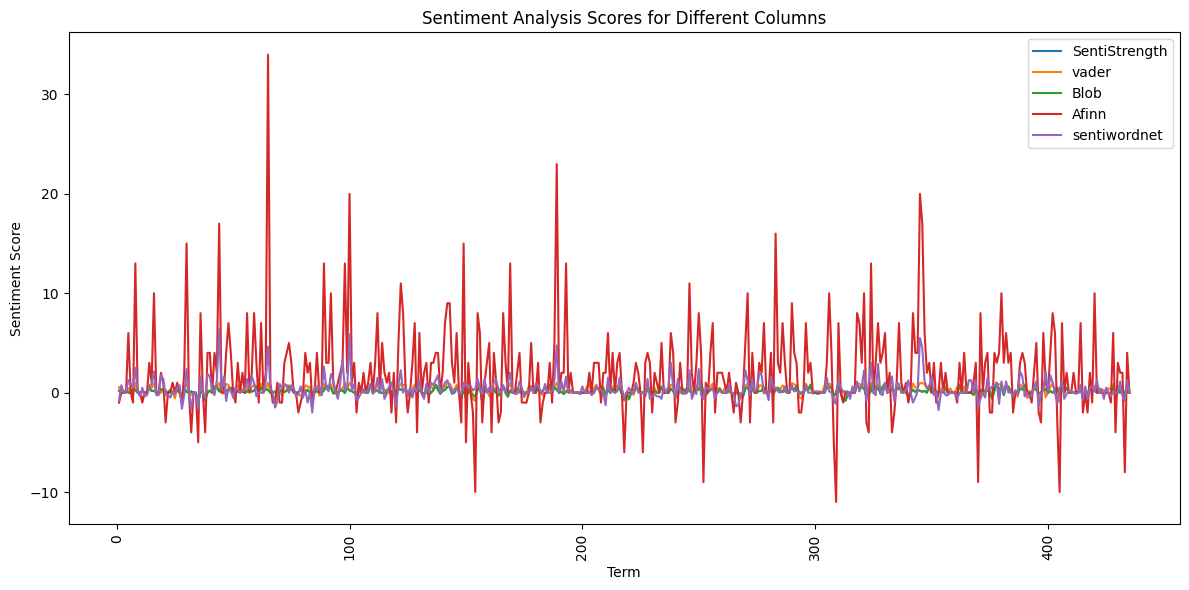

In [41]:
import matplotlib.pyplot as plt

# Extracting 'id' column and sentiment columns
terms = data['id']
sentiment_columns = ['SentiStrength', 'vader', 'Blob', 'Afinn', 'sentiwordnet']

# Plotting line graph for each sentiment column
plt.figure(figsize=(12, 6))
for column in sentiment_columns:
    plt.plot(terms, data[column], label=column)

# Adding labels and title
plt.xlabel('Term')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Scores for Different Columns')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


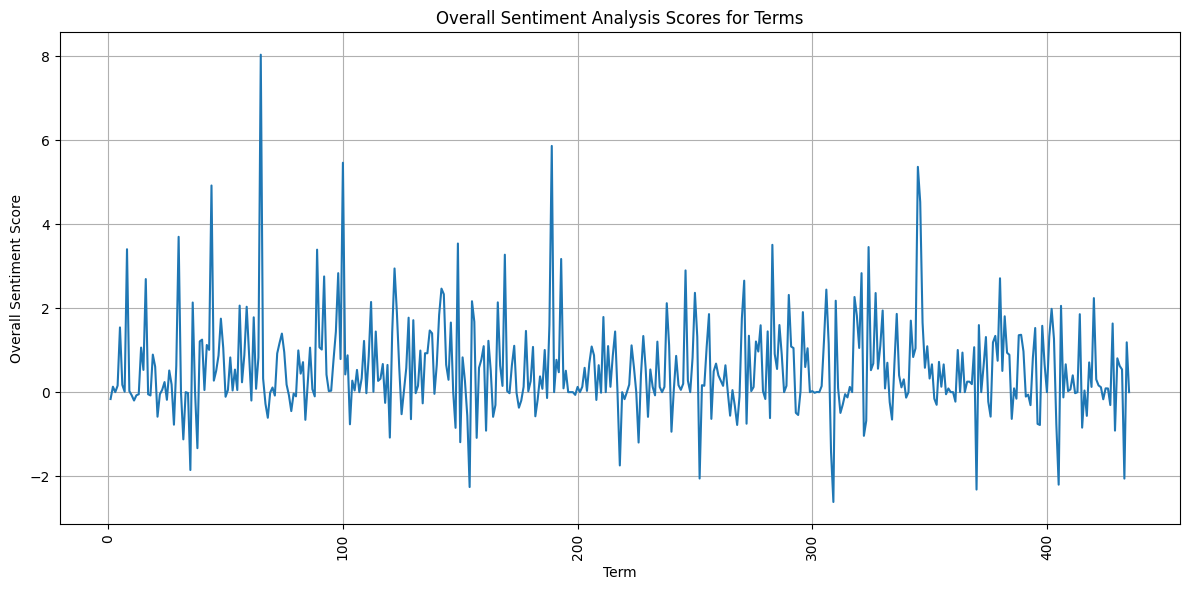

In [42]:
import matplotlib.pyplot as plt

# Plotting 'term' vs 'overall_sentiment' as a line graph
plt.figure(figsize=(12, 6))
plt.plot(data['id'], data['overall_sentiment'], linestyle='-')

# Adding labels and title
plt.xlabel('Term')
plt.ylabel('Overall Sentiment Score')
plt.title('Overall Sentiment Analysis Scores for Terms')
plt.xticks(rotation=90)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [44]:
# Save DataFrame to CSV file
data.to_csv('competitor_sentiment_analysis_results.csv', index=False)  # Set index=False to avoid saving the DataFrame index

# Save DataFrame to Excel file
data.to_excel('competitor_sentiment_analysis_results.xlsx', index=False)  # Set index=False to avoid saving the DataFrame index


In [45]:
%ls


competitor_sentiment_analysis_results.csv   sentiment_analysis_results.xlsx
competitor_sentiment_analysis_results.xlsx  SentiStrengthCom.jar
drive/                                      SentiStrengthData/
sample_data/                                SentStrength_Data_2010.zip
sentiment_analysis_results.csv


In [46]:
from google.colab import files

# Save DataFrame to CSV file
data.to_csv('competitor_sentiment_analysis_results.csv', index=False)  # Set index=False to avoid saving the DataFrame index

# Save DataFrame to Excel file
data.to_excel('competitor_sentiment_analysis_results.xlsx', index=False)  # Set index=False to avoid saving the DataFrame index

# Download CSV file
files.download('competitor_sentiment_analysis_results.csv')

# Download Excel file
files.download('competitor_sentiment_analysis_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Filter the original DataFrame to select rows where 'overall_sentiment' is different from 0
competitor_contrast_sentiment = data[data['overall_sentiment'] != 0][['description', 'overall_sentiment']]

# Display the new dataset
print(competitor_contrast_sentiment)


                                           description  overall_sentiment
0    CORRECTION: The Honda Civic only includes *2 y...          -0.163760
1    I wonder how long before we need a subscriptio...           0.130000
3    I like this civic but can I trust the turbo on...           0.155620
4    I\'d have to go with the Rolla. A massive 14 m...           1.541760
5    is it just me or does the civic seem way large...           0.175000
..                                                 ...                ...
428  Corolla is more reliable, and that\'s what mat...           0.805160
429  @@dli8548 The N/A 2.0L in the Civic will be ju...           0.625000
430  @@limitedreach4446 it\'s not , the reliability...           0.540440
431  @@dli8548 Wrong. The Civic here in the states ...          -2.059260
432  @@limitedreach4446 the Corolla has nearly alwa...           1.186787

[404 rows x 2 columns]


In [49]:
from google.colab import files


# Save the filtered DataFrame to an Excel file
competitor_contrast_sentiment.to_excel('competitor_contrast_sentiment.xlsx', index=False)

# Download the Excel file
files.download('competitor_contrast_sentiment.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>